<a href="https://colab.research.google.com/github/coder-j-0090/Self_Study/blob/main/Python_DataAnalysis_ML/9_1_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%86%90%EA%B8%80%EC%94%A8_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#텐서플로우는 딥러닝입니다.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#mnist 데이터셋 불러오기
mnist = keras.datasets.mnist

In [ ]:
#mnist 데이터셋 학습용(x,y) 테스트용(x,y) 으로 나누기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#학습용 데이터 살펴보기
x_train.shape

(60000, 28, 28)

In [ ]:
#학습용 첫번째 데이터 살펴보기!
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
#학습용 첫번째 데이터 살펴보기2
y_train[0]

5

In [ ]:
#데이터전처리(0~1 사이 숫자로)
x_train = x_train/225
x_test = x_test/225


In [ ]:
#데이터 전처리 결과 확인
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#모델만들기 : 입력층(784) - 은닉층1(256) - 은닉층2(128) - 은닉층3(64) - 출력층(10)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')   #확률 출력해준다
])

In [ ]:
#모델 컴파일 : 최적화 함수, 손실 함수 설정 + 평가 지표 설정 + 가중치 초기화
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델학습 : 전체 데이터는 5번 반복
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 28s 14ms/step - loss: 0.2133 - accuracy: 0.9365
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0922 - accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0664 - accuracy: 0.9794
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0494 - accuracy: 0.9845
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0405 - accuracy: 0.9869


In [ ]:
#model 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0829 - accuracy: 0.9753


[0.08287188410758972, 0.9753000140190125]

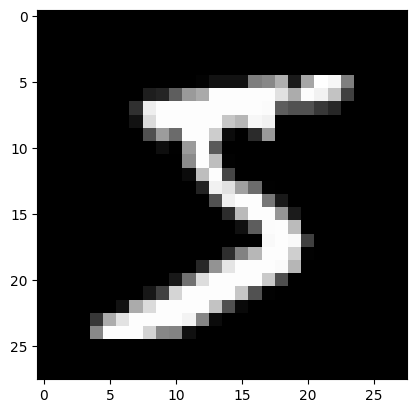

In [ ]:
#예측 - 0 번째 숫자 이미지로 보기
plt.imshow(x_train[0], cmap = 'gray')
plt.show()

In [ ]:
#예측 - 0번째 숫자 예측하기1
print(model.predict(x_train[0].reshape(1, 28, 28)))

1/1 [==============================] - 0s 128ms/step
[[3.22610303e-18 1.22119035e-14 5.78512078e-19 3.43592592e-06
  3.13267257e-18 9.99996543e-01 9.21218846e-16 6.76050982e-16
  8.45797567e-14 4.94501315e-11]]


In [ ]:
#예측 - 0번째 숫자 예측하기1
print(np.argmax(model.predict(x_train[0].reshape(1, 28, 28))))

1/1 [==============================] - 0s 27ms/step
5
